# Digital Signal Processing
## Convolution and Correlation

### MsCV - ViBOT - MAIA

In [33]:
%matplotlib inline
%pprint off

# To make some nice plot
import matplotlib.pyplot as plt
# To play with arrays
import numpy as np
from skimage import io
from skimage import img_as_float
from matplotlib import cm
from scipy import signal
from scipy import misc
from PIL import Image

Pretty printing has been turned OFF


## Exercise 1- 1D Convolution

**1.1** Defining a signal $x$ and an impulse response $h$ as parameters, write a program `conv_fn` to compute the convolution product $y=h*x$. Do not use the python or matlab function and just consider zero padding to solve the border problem.

**1.2** Test your function, while using the following signal ($x[n] = \{\underline{1},2,3,4\}$) and following filters, ($\delta[k]$, $H[k]$, $e^{k}$, and $h = \{-1, 1\}$), respectively.

**1.3** Consider the previous input signal, write it's extended version while considering `symmetry`, `periodic` and `constant values` padding and $h = H[k-5]$



In [19]:
def conv(x,h):
    xpad = np.lib.pad(x, (len(h)-1,len(h)-1), 'constant', constant_values = (0))
    x_conv = np.zeros((len(x)+len(h)-1,))
    hf = h[::-1]
    #print(xpad)
    #print(x_conv)
    #print(hf)
    for i in range(len(x_conv)):
        #print("i=%f"%i)
        for j in range(len(h)):
            #print("h=%f"%j)
            x_conv[i] += xpad[i+j] * hf[j]
            #print(x_conv)
    return x_conv

def dirac(n=0, N=20):
    if n > N - 1:
        raise ValueError('n should be in the range from 0 to N-1')
            
    s = np.zeros((N, ))
    s[n] = 1
    
    return s

def step(n=0, N=20):
    if n > N - 1:
        raise ValueError('n should be in the range from 0 to N-1')
    
    s = np.zeros((N, ))
    for n in range (n, N):
        s[n] = 1
    
    return s

def exp(n=0, N=20):
    if n>N-1:
        raise ValueError('n should be in the range from 0 to N-1')
        
    s = np.zeros((N, ))
    for n in range (n,N):
        s[n] = np.exp(n)
    
    return s

x = [1,2,3,4]
h1 = [0,0,1,0,0]
h2 = [0,0,1,1,1,]
h3 = [-1,0,1]
conv_out1 = conv(x,h1)
conv_out2 = conv(x,h2)
conv_out3 = conv(x,h3)
print(conv_out1)
print(conv_out2)
print(conv_out3)

[ 0.  0.  1.  2.  3.  4.  0.  0.]
[ 0.  0.  1.  3.  6.  9.  7.  4.]
[-1. -2. -2. -2.  3.  4.]


In [20]:
x = [1,2,3,4]
h1 = dirac(N=5)
h2 = step(N=5)
h3 = exp(N=5)
h4= np.array([-1,0,1])

conv_out1= conv(x,h1)
conv_out2=conv(x,h2)
conv_out3=conv(x,h3)
conv_out4=conv(x,h4)
print(conv_out1)
print(conv_out2)
print(conv_out3)
print(conv_out4)

[ 1.  2.  3.  4.  0.  0.  0.  0.]
[  1.   3.   6.  10.  10.   9.   7.   4.]
[   1.            4.71828183   15.82561976   47.01849461  127.80951949
  199.00913523  244.13659779  218.39260013]
[-1. -2. -2. -2.  3.  4.]


## Exercise 2- 2D Convolution

**2.1** Define a 2D convolution function (Only consider zero-padding the image)

**2.2** Using your function, smooth the `lena` image with the following Gaussian kernel:
$$ K = \frac{1.}{256}\begin{bmatrix} 1 & 4 & 6 & 4 & 1 \\ 4 & 16 & 24 & 16 & 4 \\ 6 & 24 & 36 & 24 & 6 \\ 4 & 16 & 24 & 16 & 4 \\ 1 & 4 & 6 & 4 & 1 \end{bmatrix}$$

**2.3** Apply sobel filtering using convolution


In [36]:
def conv2d(x,y):
    s = signal.convolve2d(x,y)
    return s

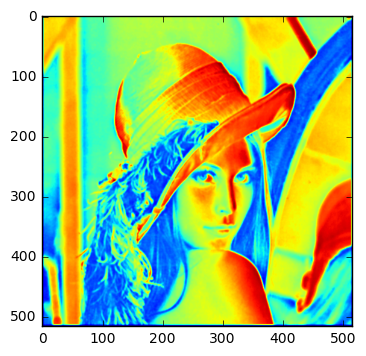

In [41]:
lena = Image.open("./images/lena-grey.bmp")
lena_im = np.array(lena)
K  = np.array([[1,4,6,4,1],[4,16,24,16,4],[6,24,36,24,6],[4,16,24,16,4],[1,4,6,4,1]])
K = 1/256 * K
out = conv2d(lena_im, K)
plt.figure()
plt.imshow(out)

## Exercise 3 - Character recognition using cross-correlation

**3.1** load `a.png` and `text.png` images and binarized them using [`threshold_otsu`](http://scikit-image.org/docs/dev/api/skimage.filters.html?highlight=filters#skimage.filters.threshold_otsu)

**3.2** Use [`signal.correlate2d`](https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.signal.correlate2d.html#scipy.signal.correlate2d) from `scipy` to correlate your binarized images.
**Note, signal correspond to the bright pixels within and image (invert your masks)**

**3.3** Find the first 10 characters recognized as `a`.